# 모듈

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [2]:
!pip install -q catboost

!pip install -q Autogluon

In [3]:
!pip install --upgrade -q catboost

In [4]:
!pip install scikit-learn==1.3.0

!pip install --upgrade -q autogluon


# 데이터

In [5]:
import os
os.chdir('/content/drive/MyDrive/데이터분석 부트캠프 24.02.14/파이널프로젝트/개인/raw_data')

In [6]:
raw_train= pd.read_csv('train.csv')
raw_test= pd.read_csv('test.csv')
sample_submission= pd.read_csv('sample_submission.csv')
sub_data1=pd.read_csv('abalone.csv')

In [7]:
#raw_train.shape, raw_test.shape, sample_submission.shape, sub_data1.shape, sub_data2.shape

In [8]:
display(raw_train.info()), display(raw_test.info()), display(sub_data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole weight    60411 non-null  float64
 6   Whole weight.1  60411 non-null  float64
 7   Whole weight.2  60411 non-null  float64
 8   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


None

(None, None, None)

In [9]:
raw_train.drop('id', axis=1, inplace=True)
raw_test.drop('id', axis=1, inplace=True)

In [10]:
sub_data1.rename(columns={'Shucked weight':'Whole weight.1','Viscera weight':'Whole weight.2'}, inplace=True)

In [11]:
raw_train=pd.concat([raw_train, sub_data1], axis=0)

In [12]:
display(raw_train.info()), display(raw_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94792 non-null  object 
 1   Length          94792 non-null  float64
 2   Diameter        94792 non-null  float64
 3   Height          94792 non-null  float64
 4   Whole weight    94792 non-null  float64
 5   Whole weight.1  94792 non-null  float64
 6   Whole weight.2  94792 non-null  float64
 7   Shell weight    94792 non-null  float64
 8   Rings           94792 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 7.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             60411 non-null  object 
 1   Length          60411 non-null  float64
 2   Diameter        60411 non-null  float64
 3   Height          60411 non-null  float64
 4   Whole weight    60411 non-null  float64
 5   Whole weight.1  60411 non-null  float64
 6   Whole weight.2  60411 non-null  float64
 7   Shell weight    60411 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.7+ MB


None

(None, None)

In [13]:
X= raw_train.drop('Rings', axis=1)
y= raw_train['Rings']

# 새 섹션

# autogluon 베이스라인
- Score: 0.14734

In [ ]:
from autogluon.tabular import TabularPredictor

In [ ]:
predictor = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='mean_absolute_error',sample_weight='auto_weight').fit(raw_train,presets="best_quality",
                                                                    auto_stack=True,save_space=True,
                                                                    num_stack_levels=3, num_bag_folds=4,num_bag_sets=8,time_limit=3600)

No path specified. Models will be saved in: "AutogluonModels/ag-20240425_014956"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=3, num_bag_folds=4, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240425_014956/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 1225 secon

In [ ]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L5,-1.232765,mean_absolute_error,454.819574,1341.490261,0.002660,0.452603,5,True,19
1,WeightedEnsemble_L3,-1.232881,mean_absolute_error,445.261671,756.822176,0.003300,0.260551,3,True,12
2,LightGBMXT_BAG_L2,-1.233793,mean_absolute_error,444.532624,681.085474,3.780001,26.273152,2,True,8
3,WeightedEnsemble_L4,-1.233990,mean_absolute_error,454.820091,1341.250674,0.003177,0.213016,4,True,16
4,CatBoost_BAG_L2,-1.234250,mean_absolute_error,440.863933,714.839775,0.111311,60.027453,2,True,11
5,WeightedEnsemble_L2,-1.234391,mean_absolute_error,431.993952,589.859531,0.002492,0.255463,2,True,7
6,LightGBMXT_BAG_L3,-1.234841,mean_absolute_error,453.895489,1325.314492,1.990645,19.423302,3,True,13
7,LightGBM_BAG_L2,-1.235023,mean_absolute_error,441.367058,670.261020,0.614436,15.448698,2,True,9
8,LightGBM_BAG_L3,-1.235275,mean_absolute_error,452.826269,1321.614356,0.921425,15.723166,3,True,14
9,LightGBMXT_BAG_L4,-1.237514,mean_absolute_error,465.048702,1852.198879,2.931788,22.408814,4,True,17


In [ ]:
predictor

In [ ]:
preds = predictor.predict(raw_test)

In [ ]:
preds

0         9.796424
1         9.663094
2        10.069514
3        10.615519
4         7.658591
           ...    
60406     6.494478
60407     9.390941
60408    12.531056
60409    13.717181
60410     8.530076
Name: Rings, Length: 60411, dtype: float32

In [ ]:
sample_submission['Rings']=preds
sample_submission.to_csv('submission_v1.csv', index=False)

# 2트
- eval_metric mse -> rmse 수정
- 배깅세트 8 -> 3
- Score: 0.14740

In [ ]:
raw_train.shape

(94792, 9)

In [ ]:
predictor = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(raw_train,presets="best_quality",
                                                                    auto_stack=True,save_space=True,
                                                                    num_stack_levels=3, num_bag_folds=4,num_bag_sets=3,time_limit=3600)

No path specified. Models will be saved in: "AutogluonModels/ag-20240425_042014"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=3, num_bag_folds=4, num_bag_sets=3
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240425_042014/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 1068 secon

In [ ]:
preds = predictor.predict(raw_test)

In [ ]:
sample_submission['Rings']=preds
sample_submission.to_csv('submission_v2.csv', index=False)

In [ ]:
predictor.get_model_best()

<ipython-input-51-9610ad6b6b76>:1: DeprecationWarning: `get_model_best` has been deprecated and will be removed in version 1.2. Please use `model_best` instead. This will raise an error in the future!
  predictor.get_model_best()


'WeightedEnsemble_L5'

In [ ]:
predictor.get_model_names()

<ipython-input-55-9cc91a61d9ae>:1: DeprecationWarning: `get_model_names` has been deprecated and will be removed in version 1.2. Please use `model_names` instead. This will raise an error in the future!
  predictor.get_model_names()


['KNeighborsUnif_BAG_L1',
 'KNeighborsDist_BAG_L1',
 'LightGBMXT_BAG_L1',
 'LightGBM_BAG_L1',
 'RandomForestMSE_BAG_L1',
 'CatBoost_BAG_L1',
 'WeightedEnsemble_L2',
 'LightGBMXT_BAG_L2',
 'LightGBM_BAG_L2',
 'RandomForestMSE_BAG_L2',
 'CatBoost_BAG_L2',
 'WeightedEnsemble_L3',
 'LightGBMXT_BAG_L3',
 'LightGBM_BAG_L3',
 'RandomForestMSE_BAG_L3',
 'CatBoost_BAG_L3',
 'WeightedEnsemble_L4',
 'LightGBMXT_BAG_L4',
 'LightGBM_BAG_L4',
 'WeightedEnsemble_L5']

In [ ]:
!sudo apt-get install graphviz graphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jamm

In [ ]:
!pip install -q pygraphviz

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
predictor.plot_ensemble_model()

'AutogluonModels/ag-20240425_042014/ensemble_model.png'

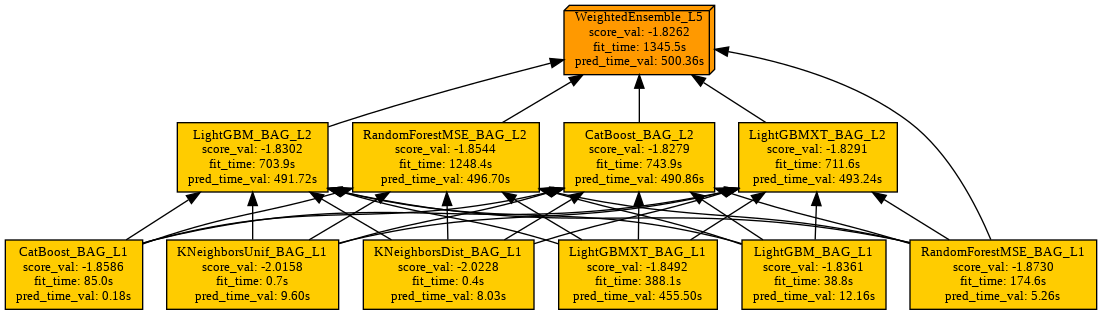

In [ ]:

from IPython.display import Image
Image('AutogluonModels/ag-20240425_042014/ensemble_model.png')

In [ ]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L5,-1.826241,root_mean_squared_error,500.361940,1345.507761,0.002693,0.247655,5,True,20
1,WeightedEnsemble_L3,-1.826323,root_mean_squared_error,500.361572,1345.371796,0.002325,0.111691,3,True,12
2,WeightedEnsemble_L2,-1.826605,root_mean_squared_error,473.092203,686.574700,0.002311,0.138478,2,True,7
3,CatBoost_BAG_L2,-1.827911,root_mean_squared_error,490.856187,743.895047,0.139430,56.373334,2,True,11
4,WeightedEnsemble_L4,-1.828848,root_mean_squared_error,511.664032,1898.685316,0.002423,0.105559,4,True,17
5,LightGBMXT_BAG_L2,-1.829087,root_mean_squared_error,493.240622,711.643727,2.523865,24.122015,2,True,8
6,CatBoost_BAG_L3,-1.829763,root_mean_squared_error,500.477868,1370.742545,0.118622,25.482439,3,True,16
7,LightGBM_BAG_L2,-1.830173,root_mean_squared_error,491.716979,703.899613,1.000222,16.377901,2,True,9
8,LightGBMXT_BAG_L3,-1.830982,root_mean_squared_error,503.300492,1365.168874,2.941245,19.908768,3,True,13
9,LightGBM_BAG_L3,-1.831717,root_mean_squared_error,501.659360,1360.825489,1.300113,15.565383,3,True,14


# 3트2
- rmsle 만들어서 넣기
  - 못넣음 있는것만 써야함 RSME 사용
- 배깅세트 3->8
-  AutoMLPipelineFeatureGenerator 써보기
  - 더이상 유의미한 변수를 생성할 수 없음
- 데이터 MINMAXSCALE, LOG(Y)
- Score: 0.19185


- - 데이터 MINMAXSCALE, LOG(Y) -> 전부 log


In [ ]:
raw_train.shape,raw_test.shape

((94792, 9), (60411, 8))

In [ ]:
raw_train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [ ]:
display(raw_train.info()),display(raw_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94792 non-null  object 
 1   Length          94792 non-null  float64
 2   Diameter        94792 non-null  float64
 3   Height          94792 non-null  float64
 4   Whole weight    94792 non-null  float64
 5   Whole weight.1  94792 non-null  float64
 6   Whole weight.2  94792 non-null  float64
 7   Shell weight    94792 non-null  float64
 8   Rings           94792 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 7.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             60411 non-null  object 
 1   Length          60411 non-null  float64
 2   Diameter        60411 non-null  float64
 3   Height          60411 non-null  float64
 4   Whole weight    60411 non-null  float64
 5   Whole weight.1  60411 non-null  float64
 6   Whole weight.2  60411 non-null  float64
 7   Shell weight    60411 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.7+ MB


None

(None, None)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## MinMaxScaler 객체 생성
#scaler = MinMaxScaler()

# MinMax 스케일링을 적용할 피쳐 선택
features_to_scale = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']

# 선택한 피쳐에 대해 MinMax 스케일링 수행
raw_train_scaled = raw_train.copy()  # 원본 데이터를 보존하기 위해 복사본 생성
raw_train_scaled[features_to_scale] = np.log1p(raw_train[features_to_scale])


In [ ]:
raw_test_scaled = raw_test.copy()  # 원본 데이터를 보존하기 위해 복사본 생성
raw_test_scaled[features_to_scale] =  np.log1p(raw_test[features_to_scale])

In [ ]:
raw_train_scaled['Rings']=np.log1p(raw_train['Rings'])

In [ ]:
raw_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94792 non-null  object 
 1   Length          94792 non-null  float64
 2   Diameter        94792 non-null  float64
 3   Height          94792 non-null  float64
 4   Whole weight    94792 non-null  float64
 5   Whole weight.1  94792 non-null  float64
 6   Whole weight.2  94792 non-null  float64
 7   Shell weight    94792 non-null  float64
 8   Rings           94792 non-null  float64
dtypes: float64(8), object(1)
memory usage: 7.2+ MB


In [ ]:
display(raw_train.head()),display(raw_test.head())

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


(None, None)

In [ ]:
predictor3 = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(raw_train_scaled,presets="best_quality",
                                                                    auto_stack=True,save_space=True,
                                                                    num_stack_levels=3, num_bag_folds=4,num_bag_sets=8,time_limit=3600
                                                                          )

No path specified. Models will be saved in: "AutogluonModels/ag-20240425_093219"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=3, num_bag_folds=4, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240425_093219/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 1319 secon

In [ ]:
preds3 = predictor3.predict(raw_test)

In [ ]:
sample_submission['Rings']=np.expm1(preds3)
sample_submission.to_csv('submission_v4.csv', index=False)

In [ ]:
predictor3.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L5,-0.148443,root_mean_squared_error,473.667564,1807.534562,0.002255,0.219629,5,True,18
1,WeightedEnsemble_L3,-0.148458,root_mean_squared_error,465.983631,1261.333740,0.002188,0.104264,3,True,11
2,WeightedEnsemble_L2,-0.148565,root_mean_squared_error,433.888026,613.736481,0.002261,0.276274,2,True,6
3,WeightedEnsemble_L4,-0.148646,root_mean_squared_error,476.858494,1830.741594,0.002268,0.082966,4,True,15
4,CatBoost_BAG_L2,-0.148655,root_mean_squared_error,453.873229,664.776505,0.185380,50.334479,2,True,10
5,LightGBM_BAG_L2,-0.148681,root_mean_squared_error,455.177763,631.832294,1.489914,17.390268,2,True,8
6,LightGBM_BAG_L3,-0.148752,root_mean_squared_error,467.483021,1278.723882,1.501578,17.494406,3,True,13
7,LightGBMXT_BAG_L2,-0.148755,root_mean_squared_error,458.177375,643.151742,4.489527,28.709717,2,True,7
8,LightGBMXT_BAG_L3,-0.148837,root_mean_squared_error,469.172360,1284.573170,3.190917,23.343694,3,True,12
9,LightGBM_BAG_L4,-0.149020,root_mean_squared_error,479.117851,1847.245071,2.261625,16.586444,4,True,17


# 베이스라인 변형 1
- rmsle구현 - 왜 안됨 docs에선 된다며
- 설정변경 presets="high_quality"
- Score: 0.14746



In [ ]:
import numpy as np
from sklearn.metrics import make_scorer

def rmsle(y_true, y_pred):
    """
    Root Mean Squared Logarithmic Error 계산
    """
    assert len(y_true) == len(y_pred)
    squared_log_errors = (np.log1p(y_pred) - np.log1p(y_true)) ** 2
    return np.sqrt(np.mean(squared_log_errors))

# RMSLE 스코어 함수 생성
rmsle_scorer = make_scorer(name='rmsle',
                            score_func=rmsle,
                            optimum=0,
                            greater_is_better=False)


In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
predictor = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(raw_train,presets="high_quality",
                                                                    auto_stack=True,save_space=True,
                                                                    num_stack_levels=3, num_bag_folds=4,num_bag_sets=8,time_limit=3600)

No path specified. Models will be saved in: "AutogluonModels/ag-20240425_142344"
Presets specified: ['high_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=3, num_bag_folds=4, num_bag_sets=8
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~4x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked

	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.

In [ ]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L5,-1.826560,root_mean_squared_error,483.051759,1805.817650,0.002973,0.300481,5,False,19
1,WeightedEnsemble_L2,-1.826710,root_mean_squared_error,461.167429,599.286037,0.003011,0.267534,2,False,7
2,WeightedEnsemble_L3,-1.826726,root_mean_squared_error,477.282151,1285.516826,0.002807,0.155169,3,False,12
3,LightGBMXT_BAG_L2,-1.828941,root_mean_squared_error,470.460244,664.127582,2.953037,22.491222,2,False,8
4,WeightedEnsemble_L4,-1.829460,root_mean_squared_error,487.091645,1841.480505,0.002392,0.091560,4,False,16
5,LightGBM_BAG_L2,-1.830272,root_mean_squared_error,468.212630,658.005214,0.705423,16.368854,2,False,9
6,LightGBMXT_BAG_L3,-1.830978,root_mean_squared_error,480.064245,1305.944652,2.784900,20.582995,3,False,13
7,LightGBM_BAG_L3,-1.831773,root_mean_squared_error,478.534912,1300.650439,1.255568,15.288781,3,False,14
8,CatBoost_BAG_L2,-1.833890,root_mean_squared_error,467.673083,662.355582,0.165876,20.719222,2,False,11
9,LightGBM_BAG_L4,-1.835435,root_mean_squared_error,487.811437,1856.685121,0.722183,15.296176,4,False,18


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
Name: score_val, dtype: float64

In [ ]:
preds = predictor.predict(raw_test)

In [ ]:
preds

0         9.943729
1         9.720905
2        10.159467
3        10.900620
4         7.699891
           ...    
60406     6.451683
60407     9.385872
60408    12.574916
60409    13.783690
60410     8.585020
Name: Rings, Length: 60411, dtype: float32

In [ ]:
sample_submission['Rings']=preds
sample_submission.to_csv('submission_v5.csv', index=False)

# 베이스라인 변형2
- 스텍 레벨 3 -> 2
- bag_fold 4 -> 10
- Score: 0.14725

In [ ]:
predictor = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(raw_train,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=2, num_bag_folds=10,num_bag_sets=8,time_limit=3600)

No path specified. Models will be saved in: "AutogluonModels/ag-20240426_011110"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240426_011110/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 1107 seco

In [ ]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L4,-1.825456,root_mean_squared_error,493.469488,1837.837973,0.002226,0.238268,4,True,15
1,WeightedEnsemble_L3,-1.826369,root_mean_squared_error,486.755342,1717.366429,0.002034,0.138680,3,True,12
2,WeightedEnsemble_L2,-1.827222,root_mean_squared_error,465.693256,988.322051,0.002985,0.105590,2,True,5
3,CatBoost_BAG_L2,-1.827943,root_mean_squared_error,472.854437,1144.485652,0.164329,155.871370,2,True,9
4,LightGBMXT_BAG_L2,-1.828696,root_mean_squared_error,476.573811,1053.288533,3.883703,64.674251,2,True,6
5,LightGBM_BAG_L2,-1.829168,root_mean_squared_error,473.574210,1030.419600,0.884102,41.805318,2,True,7
6,LightGBM_BAG_L3,-1.829797,root_mean_squared_error,493.467263,1837.599705,1.134011,54.165411,3,True,14
7,XGBoost_BAG_L2,-1.830413,root_mean_squared_error,473.665006,1028.320554,0.974898,39.706272,2,True,11
8,LightGBM_BAG_L1,-1.831046,root_mean_squared_error,14.712787,102.477664,14.712787,102.477664,1,True,4
9,LightGBMXT_BAG_L3,-1.831346,root_mean_squared_error,495.310318,1839.868379,2.977066,56.434086,3,True,13


In [ ]:
preds = predictor.predict(raw_test)

In [ ]:
preds

0         9.839458
1         9.667371
2        10.072104
3        10.393205
4         7.606987
           ...    
60406     6.471008
60407     9.483736
60408    13.166000
60409    14.046074
60410     8.286358
Name: Rings, Length: 60411, dtype: float32

In [ ]:
sample_submission['Rings']=preds
sample_submission.to_csv('submission_v6.csv', index=False)

# 베이스라인 변형 2-1
- 스텍 레벨 3
- bag_fold 10
- Score: 0.14799

In [ ]:
predictor = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(raw_train,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=3, num_bag_folds=10,num_bag_sets=8,time_limit=3600)

No path specified. Models will be saved in: "AutogluonModels/ag-20240426_025201"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=3, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240426_025201/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 1022 seco

In [ ]:
preds = predictor.predict(raw_test)

In [ ]:
preds

0         9.769266
1         9.601682
2        10.047269
3        10.466954
4         7.657487
           ...    
60406     6.538966
60407     9.635654
60408    12.470186
60409    13.869423
60410     8.313216
Name: Rings, Length: 60411, dtype: float32

In [ ]:
sample_submission['Rings']=preds
sample_submission.to_csv('submission_v7.csv', index=False)

# 레벨은 2층이 맞음

# 아 , hyperparameters='auto'를 켜야한데

# 베이스라인 변형 2에서 튜닝 on, default
- Score: 0.14725 기본적용이잖아 gpt 새끼야

In [ ]:
predictor = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(raw_train,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=2, num_bag_folds=10,num_bag_sets=8,time_limit=3600
                                                                                 , hyperparameters='default')

No path specified. Models will be saved in: "AutogluonModels/ag-20240426_055114"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240426_055114/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 1043 seco

In [ ]:
preds = predictor.predict(raw_test)

In [ ]:
preds

0         9.769266
1         9.601682
2        10.047269
3        10.466954
4         7.657487
           ...    
60406     6.538966
60407     9.635654
60408    12.470186
60409    13.869423
60410     8.313216
Name: Rings, Length: 60411, dtype: float32

In [ ]:
sample_submission['Rings']=preds
sample_submission.to_csv('submission_v8.csv', index=False)

In [ ]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L4,-1.825479,root_mean_squared_error,478.383422,1870.670588,0.002209,0.215059,4,True,15
1,WeightedEnsemble_L3,-1.826407,root_mean_squared_error,470.507934,1724.049253,0.002885,0.177516,3,True,12
2,WeightedEnsemble_L2,-1.827222,root_mean_squared_error,450.022451,993.273382,0.004500,0.102666,2,True,5
3,CatBoost_BAG_L2,-1.827923,root_mean_squared_error,459.060585,1161.984335,0.274790,168.258244,2,True,9
4,LightGBMXT_BAG_L2,-1.828696,root_mean_squared_error,462.882182,1062.198723,4.096386,68.472631,2,True,6
5,LightGBM_BAG_L2,-1.829168,root_mean_squared_error,459.886859,1042.758544,1.101064,49.032453,2,True,7
6,LightGBM_BAG_L3,-1.829726,root_mean_squared_error,478.381212,1870.455529,1.191879,49.594253,3,True,14
7,LightGBM_BAG_L1,-1.831046,root_mean_squared_error,14.150086,107.507867,14.150086,107.507867,1,True,4
8,LightGBMXT_BAG_L3,-1.831325,root_mean_squared_error,479.800510,1881.954860,2.611176,61.093584,3,True,13
9,LightGBMXT_BAG_L1,-1.846058,root_mean_squared_error,429.949432,885.310305,429.949432,885.310305,1,True,3


# 성별에 따라 3개로 분리해서 학습 & 예측
- Score: 0.14803
- 줜나 이해안되네 진짜

In [ ]:
raw_train['Sex'].unique()

array(['F', 'I', 'M'], dtype=object)

In [ ]:
sf_train=raw_train[raw_train['Sex']=='F']
sm_train=raw_train[raw_train['Sex']=='M']
si_train=raw_train[raw_train['Sex']=='I']

In [ ]:
sf_train.head(2)

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.55,0.43,0.150,0.7715,0.3285,0.1465,0.24,11
1,F,0.63,0.49,0.145,1.1300,0.4580,0.2765,0.32,11


In [ ]:
sf_test=raw_test[raw_test['Sex']=='F']
sm_test=raw_test[raw_test['Sex']=='M']
si_test=raw_test[raw_test['Sex']=='I']

In [ ]:
sm_test.head(2)

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,M,0.645,0.475,0.155,1.238,0.6185,0.3125,0.3005
1,M,0.580,0.460,0.160,0.983,0.4785,0.2195,0.2750


In [ ]:
predictor_sf = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(sf_train,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=2, num_bag_folds=10,num_bag_sets=8,time_limit=3600
                                                                                 , hyperparameters='default')

No path specified. Models will be saved in: "AutogluonModels/ag-20240426_075249"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240426_075249/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 971 secon

In [ ]:
predictor_sm = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(sm_train,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=2, num_bag_folds=10,num_bag_sets=8,time_limit=3600
                                                                                 , hyperparameters='default')

No path specified. Models will be saved in: "AutogluonModels/ag-20240426_085324"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240426_085324/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 1041 seco

In [ ]:
predictor_si = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(si_train,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=2, num_bag_folds=10,num_bag_sets=8,time_limit=3600
                                                                                 , hyperparameters='default')

No path specified. Models will be saved in: "AutogluonModels/ag-20240426_094224"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240426_094224/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 1007 seco

In [ ]:
preds_sf = predictor_sf.predict(sf_test)

In [ ]:
preds_sm = predictor_sm.predict(sm_test)

In [ ]:
preds_si = predictor_si.predict(si_test)

In [ ]:
preds_con=pd.concat([preds_sf,preds_sm,preds_si])

In [ ]:
preds_con

9        11.136299
10       11.724772
12       10.535893
13       14.028003
16       12.164874
           ...    
60400     8.462595
60402     7.007778
60404    10.623417
60406     6.432914
60408    12.589523
Name: Rings, Length: 60411, dtype: float32

In [ ]:
sample_submission['Rings']=preds_con
sample_submission.to_csv('submission_v9.csv', index=False)

# 이제 뭘 시도해야하나

# 튜닝 방법을 바꿔본다 extreme
- Score: 0.14725

In [ ]:
display(raw_train.head(2))
display(raw_test.head(2))

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.55,0.43,0.150,0.7715,0.3285,0.1465,0.24,11
1,F,0.63,0.49,0.145,1.1300,0.4580,0.2765,0.32,11


,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,M,0.645,0.475,0.155,1.238,0.6185,0.3125,0.3005
1,M,0.580,0.460,0.160,0.983,0.4785,0.2195,0.2750


In [ ]:
predictor = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(raw_train,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=2, num_bag_folds=10,num_bag_sets=8,time_limit=3600
                                                                                 , hyperparameters='extreme')

No path specified. Models will be saved in: "AutogluonModels/ag-20240426_123751"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240426_123751/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 1100 seco

In [ ]:
preds = predictor.predict(raw_test)

In [ ]:
sample_submission['Rings']=preds
sample_submission.to_csv('submission_v10.csv', index=False)

# 독립변수 minmax scale, 나머진 동일하게
- Score: 0.15162

In [ ]:
raw_train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min-max 스케일러 객체 생성
scaler = MinMaxScaler()
scaled_train=raw_train.copy()
# DataFrame의 특정 열을 min-max 스케일링
scaled_train.iloc[:,1:-1] = scaler.fit_transform(scaled_train.iloc[:,1:-1])


In [ ]:
raw_test.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight'],
      dtype='object')

In [ ]:
scaled_test=raw_test.copy()
scaled_test.iloc[:,1:] = scaler.fit_transform(scaled_test.iloc[:,1:])

In [ ]:
predictor = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(scaled_train,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=2, num_bag_folds=10,num_bag_sets=8,time_limit=3600
                                                                                 , hyperparameters='extreme')

No path specified. Models will be saved in: "AutogluonModels/ag-20240426_145619"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240426_145619/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 1113 seco

In [ ]:
preds = predictor.predict(scaled_test)

In [ ]:
sample_submission['Rings']=preds
sample_submission.to_csv('submission_v11.csv', index=False)

# 민맥스는 이상치에 민감함, 로부스트나 스탠다드스케일러를 쓰는게 나음, 왜도는 로그변환으로 잡는거임 스케일러와 로그변환을 함께 적용할수있음
- 민맥스 -> 로부스트
- Score: 0.14716

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
# 로부스트 스케일러 초기화
scaler = RobustScaler()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min-max 스케일러 객체 생성
#scaler = MinMaxScaler()
scaled_train=raw_train.copy()
# DataFrame의 특정 열을 min-max 스케일링
scaled_train.iloc[:,1:-1] = scaler.fit_transform(scaled_train.iloc[:,1:-1])


In [ ]:
scaled_test=raw_test.copy()
scaled_test.iloc[:,1:] = scaler.fit_transform(scaled_test.iloc[:,1:])

In [ ]:
predictor = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(scaled_train,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=2, num_bag_folds=10,num_bag_sets=8,time_limit=3600
                                                                                 , hyperparameters='extreme')

No path specified. Models will be saved in: "AutogluonModels/ag-20240427_093813"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240427_093813/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 1057 seco

In [ ]:
preds = predictor.predict(scaled_test)

In [ ]:
sample_submission['Rings']=preds
sample_submission.to_csv('submission_v12.csv', index=False)

# 로그변환 후 로부스트 스케일링
- 로부스트, 스탠다드 스케일러는 스케일링 결과가 음수가 될수있음
- 음수는 로그변환 못함
- 로그변환 - 스케일링 - (음수출현) - 로그역변환 (음수 안바뀜) - error
- 모든 스케일링이 0을기준 +-1임 음수출현가능

In [ ]:
log_train=np.log1p(raw_train.iloc[:,1:])
log_test=np.log1p(raw_test.iloc[:,1:])

In [ ]:
scaler=RobustScaler()
log_scaled_train=log_train.copy()
log_scaled_train.iloc[:,1:] = scaler.fit_transform(log_scaled_train.iloc[:,1:])
log_scaled_test=log_test.copy()
log_scaled_test.iloc[:,1:] = scaler.fit_transform(log_scaled_test.iloc[:,1:])

In [ ]:
predictor = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(log_scaled_train,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=2, num_bag_folds=10,num_bag_sets=8,time_limit=3600
                                                                                 , hyperparameters='extreme')

No path specified. Models will be saved in: "AutogluonModels/ag-20240427_112857"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240427_112857/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 1073 seco

In [ ]:
preds = predictor.predict(log_scaled_test)

In [ ]:
sample_submission['Rings']=preds
sample_submission.to_csv('submission_v13.csv', index=False)

In [ ]:
sample_submission['Rings']=np.expm1(preds)
sample_submission.to_csv('submission_v14.csv', index=False)
sample_submission

,id,Rings
0,90615,0.361663
1,90616,0.239914
2,90617,0.374386
3,90618,0.669186
4,90619,-0.382584
...,...,...
60406,151021,-0.663611
60407,151022,0.055472
60408,151023,1.822786
60409,151024,2.244918


In [ ]:
np.expm1(np.expm1(preds))

0        0.435716
1        0.271139
2        0.454099
3        0.952647
4       -0.317903
           ...   
60406   -0.485012
60407    0.057040
60408    5.189078
60409    8.439640
60410   -0.330794
Name: Rings, Length: 60411, dtype: float32

# 독립변수는 로부스트, 종속변수만 로그변환 해서 학습 & 예측 후 역함수
- Score: 0.14679

In [ ]:
raw_train= pd.read_csv('train.csv')
raw_test= pd.read_csv('test.csv')
sample_submission= pd.read_csv('sample_submission.csv')
sub_data1=pd.read_csv('abalone.csv')

In [ ]:
#raw_train.shape, raw_test.shape, sample_submission.shape, sub_data1.shape, sub_data2.shape

In [ ]:
display(raw_train.info()), display(raw_test.info()), display(sub_data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole weight    60411 non-null  float64
 6   Whole weight.1  60411 non-null  float64
 7   Whole weight.2  60411 non-null  float64
 8   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


None

(None, None, None)

In [ ]:
raw_train.drop('id', axis=1, inplace=True)
raw_test.drop('id', axis=1, inplace=True)

In [ ]:
sub_data1.rename(columns={'Shucked weight':'Whole weight.1','Viscera weight':'Whole weight.2'}, inplace=True)

In [ ]:
raw_train=pd.concat([raw_train, sub_data1], axis=0)

In [ ]:
display(raw_train.info()), display(raw_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94792 non-null  object 
 1   Length          94792 non-null  float64
 2   Diameter        94792 non-null  float64
 3   Height          94792 non-null  float64
 4   Whole weight    94792 non-null  float64
 5   Whole weight.1  94792 non-null  float64
 6   Whole weight.2  94792 non-null  float64
 7   Shell weight    94792 non-null  float64
 8   Rings           94792 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 7.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             60411 non-null  object 
 1   Length          60411 non-null  float64
 2   Diameter        60411 non-null  float64
 3   Height          60411 non-null  float64
 4   Whole weight    60411 non-null  float64
 5   Whole weight.1  60411 non-null  float64
 6   Whole weight.2  60411 non-null  float64
 7   Shell weight    60411 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.7+ MB


None

(None, None)

In [ ]:
scaler=RobustScaler()
scaled_train=raw_train.copy()
scaled_train.iloc[:,1:-1] = scaler.fit_transform(scaled_train.iloc[:,1:-1])
scaled_test=raw_test.copy()
scaled_test.iloc[:,1:] = scaler.fit_transform(scaled_test.iloc[:,1:])

In [ ]:
scaled_train['Rings']=np.log1p(scaled_train['Rings'])

In [ ]:
predictor = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(scaled_train,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=2, num_bag_folds=10,num_bag_sets=8,time_limit=3600
                                                                                 , hyperparameters='extreme')

No path specified. Models will be saved in: "AutogluonModels/ag-20240427_131148"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240427_131148/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 1123 seco

In [ ]:
preds = predictor.predict(scaled_test)

In [ ]:
preds_exp=np.expm1(preds)

In [ ]:
preds_exp

0         9.787115
1         9.657627
2         9.967853
3        10.484078
4         7.558668
           ...    
60406     6.328500
60407     9.447100
60408    12.658953
60409    13.608979
60410     7.955434
Name: Rings, Length: 60411, dtype: float32

In [ ]:
sample_submission['Rings']=preds_exp
sample_submission.to_csv('submission_v15.csv', index=False)

# 스케일링,타겟log 후 성별별로 나눠서 칼럼지우고  학습 예측, 결합 이게 오토글룸 막트인듯
- Score: 0.14749

## 데이터


In [ ]:
raw_train= pd.read_csv('train.csv')
raw_test= pd.read_csv('test.csv')
sample_submission= pd.read_csv('sample_submission.csv')
sub_data1=pd.read_csv('abalone.csv')

In [ ]:
raw_train.drop('id', axis=1, inplace=True)
raw_test.drop('id', axis=1, inplace=True)

In [ ]:
sub_data1.rename(columns={'Shucked weight':'Whole weight.1','Viscera weight':'Whole weight.2'}, inplace=True)

In [ ]:
raw_train=pd.concat([raw_train, sub_data1], axis=0)

In [ ]:
display(raw_train.info()), display(raw_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94792 non-null  object 
 1   Length          94792 non-null  float64
 2   Diameter        94792 non-null  float64
 3   Height          94792 non-null  float64
 4   Whole weight    94792 non-null  float64
 5   Whole weight.1  94792 non-null  float64
 6   Whole weight.2  94792 non-null  float64
 7   Shell weight    94792 non-null  float64
 8   Rings           94792 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 7.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             60411 non-null  object 
 1   Length          60411 non-null  float64
 2   Diameter        60411 non-null  float64
 3   Height          60411 non-null  float64
 4   Whole weight    60411 non-null  float64
 5   Whole weight.1  60411 non-null  float64
 6   Whole weight.2  60411 non-null  float64
 7   Shell weight    60411 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.7+ MB


None

(None, None)

## 작업

In [ ]:
scaler=RobustScaler()
scaled_train=raw_train.copy()
scaled_train.iloc[:,1:-1] = scaler.fit_transform(scaled_train.iloc[:,1:-1])
scaled_test=raw_test.copy()
scaled_test.iloc[:,1:] = scaler.fit_transform(scaled_test.iloc[:,1:])

In [ ]:
scaled_train['Rings']=np.log1p(scaled_train['Rings'])

In [ ]:
sf_train=scaled_train[scaled_train['Sex']=='F']
sm_train=scaled_train[scaled_train['Sex']=='M']
si_train=scaled_train[scaled_train['Sex']=='I']
sf_test=scaled_test[scaled_test['Sex']=='F']
sm_test=scaled_test[scaled_test['Sex']=='M']
si_test=scaled_test[scaled_test['Sex']=='I']

In [ ]:
sf_train_drop=sf_train.drop('Sex', axis=1)
sm_train_drop=sm_train.drop('Sex', axis=1)
si_train_drop=si_train.drop('Sex', axis=1)
sf_test_drop=sf_test.drop('Sex', axis=1)
sm_test_drop=sm_test.drop('Sex', axis=1)
si_test_drop=si_test.drop('Sex', axis=1)


In [ ]:
display(sf_train_drop.info()), display(sm_train_drop.info()), display(si_train_drop.info()),display(sf_test_drop.info()), display(sm_test_drop.info()), display(si_test_drop.info())

<class 'pandas.core.frame.DataFrame'>
Index: 27802 entries, 0 to 4175
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          27802 non-null  float64
 1   Diameter        27802 non-null  float64
 2   Height          27802 non-null  float64
 3   Whole weight    27802 non-null  float64
 4   Whole weight.1  27802 non-null  float64
 5   Whole weight.2  27802 non-null  float64
 6   Shell weight    27802 non-null  float64
 7   Rings           27802 non-null  float64
dtypes: float64(8)
memory usage: 1.9 MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 32555 entries, 3 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          32555 non-null  float64
 1   Diameter        32555 non-null  float64
 2   Height          32555 non-null  float64
 3   Whole weight    32555 non-null  float64
 4   Whole weight.1  32555 non-null  float64
 5   Whole weight.2  32555 non-null  float64
 6   Shell weight    32555 non-null  float64
 7   Rings           32555 non-null  float64
dtypes: float64(8)
memory usage: 2.2 MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 34435 entries, 2 to 4166
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          34435 non-null  float64
 1   Diameter        34435 non-null  float64
 2   Height          34435 non-null  float64
 3   Whole weight    34435 non-null  float64
 4   Whole weight.1  34435 non-null  float64
 5   Whole weight.2  34435 non-null  float64
 6   Shell weight    34435 non-null  float64
 7   Rings           34435 non-null  float64
dtypes: float64(8)
memory usage: 2.4 MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 17387 entries, 9 to 60410
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          17387 non-null  float64
 1   Diameter        17387 non-null  float64
 2   Height          17387 non-null  float64
 3   Whole weight    17387 non-null  float64
 4   Whole weight.1  17387 non-null  float64
 5   Whole weight.2  17387 non-null  float64
 6   Shell weight    17387 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 20783 entries, 0 to 60405
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          20783 non-null  float64
 1   Diameter        20783 non-null  float64
 2   Height          20783 non-null  float64
 3   Whole weight    20783 non-null  float64
 4   Whole weight.1  20783 non-null  float64
 5   Whole weight.2  20783 non-null  float64
 6   Shell weight    20783 non-null  float64
dtypes: float64(7)
memory usage: 1.3 MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 22241 entries, 4 to 60408
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          22241 non-null  float64
 1   Diameter        22241 non-null  float64
 2   Height          22241 non-null  float64
 3   Whole weight    22241 non-null  float64
 4   Whole weight.1  22241 non-null  float64
 5   Whole weight.2  22241 non-null  float64
 6   Shell weight    22241 non-null  float64
dtypes: float64(7)
memory usage: 1.4 MB


None

(None, None, None, None, None, None)

In [ ]:
display(sf_train_drop.head(2)), display(sm_train_drop.head(2)), display(si_train_drop.head(2)),display(sf_test_drop.head(2)), display(sm_test_drop.head(2)), display(si_test_drop.head(2))

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0.032258,0.04,0.2,-0.042879,-0.005226,-0.133106,0.081081,2.484907
1,0.548387,0.52,0.1,0.506126,0.445993,0.754266,0.513514,2.484907


,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
3,0.322581,0.4,0.2,0.176110,0.158537,0.269625,0.135135,2.397895
6,-0.838710,-0.8,-0.6,-0.716692,-0.573171,-0.645051,-0.513514,2.302585


,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
2,-2.483871,-2.52,-2.3,-1.192190,-1.130662,-1.112628,-1.189189,1.945910
4,0.064516,0.00,-0.2,-0.026799,0.137631,-0.040956,-0.148649,2.302585


,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
9,0.633333,0.6,1.1,0.824750,1.111888,1.037671,0.927027
10,0.466667,0.4,0.3,0.351268,0.344406,0.202055,0.554054


,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,0.666667,0.40,0.3,0.671022,1.012238,1.003425,0.408108
1,0.233333,0.28,0.4,0.279016,0.522727,0.366438,0.270270


,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
4,-0.866667,-0.8,-0.6,-0.681783,-0.599650,-0.678082,-0.648649
7,-1.366667,-1.4,-1.3,-0.974635,-0.888112,-0.910959,-0.956757


(None, None, None, None, None, None)

## 학습

In [ ]:
predictor_sf = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(sf_train_drop,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=2, num_bag_folds=10,num_bag_sets=8,time_limit=3600
                                                                                 , hyperparameters='default')

No path specified. Models will be saved in: "AutogluonModels/ag-20240428_031124"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240428_031124/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 1028 seco

In [ ]:
predictor_sm = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(sm_train_drop,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=2, num_bag_folds=10,num_bag_sets=8,time_limit=3600
                                                                                 , hyperparameters='default')

No path specified. Models will be saved in: "AutogluonModels/ag-20240428_035635"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240428_035635/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 1053 seco

In [ ]:
predictor_si = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(si_train_drop,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=2, num_bag_folds=10,num_bag_sets=8,time_limit=3600
                                                                                 , hyperparameters='default')

No path specified. Models will be saved in: "AutogluonModels/ag-20240428_044526"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240428_044526/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 1049 seco

In [ ]:
preds_sf = predictor_sf.predict(sf_test_drop)

In [ ]:
preds_sm = predictor_sm.predict(sm_test_drop)

In [ ]:
preds_si = predictor_si.predict(si_test_drop)

In [ ]:
preds_si

4        2.151870
7        1.966095
8        2.193799
11       1.963713
14       2.122190
           ...   
60400    2.222088
60402    2.067712
60404    2.425443
60406    1.971315
60408    2.573775
Name: Rings, Length: 22241, dtype: float32

In [ ]:
preds_con=pd.concat([np.expm1(preds_sf), np.expm1(preds_sm), np.expm1(preds_si)], axis=0)

In [ ]:
preds_con

9        11.062840
10       11.448881
12        9.986984
13       13.182415
16       11.924194
           ...    
60400     8.226575
60402     6.906711
60404    10.307234
60406     6.180109
60408    12.115245
Name: Rings, Length: 60411, dtype: float32

In [ ]:
sample_submission['Rings']=preds_con
sample_submission.to_csv('submission_v16.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission_v16.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 찐막  성별 라벨인코딩 추가, 타임리미트 *5
- Score: 0.14603
- TIME_LIMTE는 전과정 1회의 시간임, 튜닝, 학습, 검증 시간 중 줄이는 건 튜닝시간, 시간을 늘리면 더 튜닝 & 검증에 시간을 쓸수있게됨

In [ ]:
raw_train= pd.read_csv('train.csv')
raw_test= pd.read_csv('test.csv')
sample_submission= pd.read_csv('sample_submission.csv')
sub_data1=pd.read_csv('abalone.csv')

In [ ]:
raw_train.drop('id', axis=1, inplace=True)
raw_test.drop('id', axis=1, inplace=True)

In [ ]:
sub_data1.rename(columns={'Shucked weight':'Whole weight.1','Viscera weight':'Whole weight.2'}, inplace=True)

In [ ]:
raw_train=pd.concat([raw_train, sub_data1], axis=0)

In [ ]:
display(raw_train.info()), display(raw_test.info()),display(raw_train.head(5)), display(raw_test.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94792 non-null  object 
 1   Length          94792 non-null  float64
 2   Diameter        94792 non-null  float64
 3   Height          94792 non-null  float64
 4   Whole weight    94792 non-null  float64
 5   Whole weight.1  94792 non-null  float64
 6   Whole weight.2  94792 non-null  float64
 7   Shell weight    94792 non-null  float64
 8   Rings           94792 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 7.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             60411 non-null  object 
 1   Length          60411 non-null  float64
 2   Diameter        60411 non-null  float64
 3   Height          60411 non-null  float64
 4   Whole weight    60411 non-null  float64
 5   Whole weight.1  60411 non-null  float64
 6   Whole weight.2  60411 non-null  float64
 7   Shell weight    60411 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.7+ MB


None

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


(None, None, None, None)

In [ ]:
scaler=RobustScaler()
scaled_train=raw_train.copy()
scaled_train.iloc[:,1:-1] = scaler.fit_transform(scaled_train.iloc[:,1:-1])
scaled_test=raw_test.copy()
scaled_test.iloc[:,1:] = scaler.fit_transform(scaled_test.iloc[:,1:])

In [ ]:
scaled_train['Rings']=np.log1p(scaled_train['Rings'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
label_encoder = LabelEncoder()
scaled_train_label=scaled_train.copy()
scaled_test_label=scaled_test.copy()
# 0열에 대해 라벨 인코딩 수행
scaled_train_label.iloc[:, 0] = label_encoder.fit_transform(scaled_train_label.iloc[:, 0])
scaled_test_label.iloc[:, 0] = label_encoder.fit_transform(scaled_test_label.iloc[:, 0])


In [ ]:
display(scaled_train_label.info()), display(scaled_test_label.info()), display(scaled_train_label.head(5)), display(scaled_test_label.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94792 non-null  object 
 1   Length          94792 non-null  float64
 2   Diameter        94792 non-null  float64
 3   Height          94792 non-null  float64
 4   Whole weight    94792 non-null  float64
 5   Whole weight.1  94792 non-null  float64
 6   Whole weight.2  94792 non-null  float64
 7   Shell weight    94792 non-null  float64
 8   Rings           94792 non-null  float64
dtypes: float64(8), object(1)
memory usage: 7.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             60411 non-null  object 
 1   Length          60411 non-null  float64
 2   Diameter        60411 non-null  float64
 3   Height          60411 non-null  float64
 4   Whole weight    60411 non-null  float64
 5   Whole weight.1  60411 non-null  float64
 6   Whole weight.2  60411 non-null  float64
 7   Shell weight    60411 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.7+ MB


None

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0.032258,0.04,0.2,-0.042879,-0.005226,-0.133106,0.081081,2.484907
1,0,0.548387,0.52,0.1,0.506126,0.445993,0.754266,0.513514,2.484907
2,1,-2.483871,-2.52,-2.3,-1.192190,-1.130662,-1.112628,-1.189189,1.945910
3,2,0.322581,0.40,0.2,0.176110,0.158537,0.269625,0.135135,2.397895
4,1,0.064516,0.00,-0.2,-0.026799,0.137631,-0.040956,-0.148649,2.302585


,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,2,0.666667,0.40,0.3,0.671022,1.012238,1.003425,0.408108
1,2,0.233333,0.28,0.4,0.279016,0.522727,0.366438,0.270270
2,2,0.100000,-0.04,0.0,0.058417,0.082168,0.126712,0.083784
3,2,0.166667,0.52,0.1,0.111453,0.082168,0.140411,0.054054
4,1,-0.866667,-0.80,-0.6,-0.681783,-0.599650,-0.678082,-0.648649


(None, None, None, None)

In [ ]:
predictor = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(scaled_train_label,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=2, num_bag_folds=10,num_bag_sets=8,time_limit=3600*5
                                                                                 , hyperparameters='extreme')

No path specified. Models will be saved in: "AutogluonModels/ag-20240428_062727"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 18000 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240428_062727/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 4867 sec

In [ ]:
preds = predictor.predict(scaled_test_label)

In [ ]:
preds_exp=np.expm1(preds)

In [ ]:
preds_exp

0         9.964869
1         9.619884
2         9.885832
3        10.348589
4         7.546657
           ...    
60406     6.268482
60407     9.293481
60408    12.300609
60409    13.129315
60410     8.191219
Name: Rings, Length: 60411, dtype: float32

In [ ]:
sample_submission['Rings']=preds_exp
sample_submission.to_csv('submission_v17.csv', index=False)

In [ ]:
files.download('submission_v17.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 라벨인코딩 빼고 타임리미트 *10
- Score: 0.14602
- 증말좋은 교육자료다

In [ ]:
raw_train= pd.read_csv('train.csv')
raw_test= pd.read_csv('test.csv')
sample_submission= pd.read_csv('sample_submission.csv')
sub_data1=pd.read_csv('abalone.csv')

In [ ]:
raw_train.drop('id', axis=1, inplace=True)
raw_test.drop('id', axis=1, inplace=True)

In [ ]:
sub_data1.rename(columns={'Shucked weight':'Whole weight.1','Viscera weight':'Whole weight.2'}, inplace=True)

In [ ]:
raw_train=pd.concat([raw_train, sub_data1], axis=0)

In [ ]:
display(raw_train.info()), display(raw_test.info()),display(raw_train.head(5)), display(raw_test.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94792 non-null  object 
 1   Length          94792 non-null  float64
 2   Diameter        94792 non-null  float64
 3   Height          94792 non-null  float64
 4   Whole weight    94792 non-null  float64
 5   Whole weight.1  94792 non-null  float64
 6   Whole weight.2  94792 non-null  float64
 7   Shell weight    94792 non-null  float64
 8   Rings           94792 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 7.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             60411 non-null  object 
 1   Length          60411 non-null  float64
 2   Diameter        60411 non-null  float64
 3   Height          60411 non-null  float64
 4   Whole weight    60411 non-null  float64
 5   Whole weight.1  60411 non-null  float64
 6   Whole weight.2  60411 non-null  float64
 7   Shell weight    60411 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.7+ MB


None

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


(None, None, None, None)

In [ ]:
scaler=RobustScaler()
scaled_train=raw_train.copy()
scaled_train.iloc[:,1:-1] = scaler.fit_transform(scaled_train.iloc[:,1:-1])
scaled_test=raw_test.copy()
scaled_test.iloc[:,1:] = scaler.fit_transform(scaled_test.iloc[:,1:])

In [ ]:
scaled_train['Rings']=np.log1p(scaled_train['Rings'])

In [ ]:
predictor = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(scaled_train,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=2, num_bag_folds=10,num_bag_sets=8,time_limit=3600*10
                                                                                 , hyperparameters='extreme')

No path specified. Models will be saved in: "AutogluonModels/ag-20240428_123355"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 36000 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240428_123355/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 9358 sec

In [ ]:
preds = predictor.predict(scaled_test)

In [ ]:
preds_exp=np.expm1(preds)

In [ ]:
preds_exp

0         9.928276
1         9.622890
2         9.895990
3        10.370144
4         7.570227
           ...    
60406     6.263611
60407     9.264746
60408    12.264244
60409    13.037720
60410     8.247208
Name: Rings, Length: 60411, dtype: float32

In [ ]:
sample_submission['Rings']=preds_exp
sample_submission.to_csv('submission_v18.csv', index=False)

In [76]:
files.download('submission_v18.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 성별별로 나눠서 학습 & 예측, 타입리미트 *5
- Score: 0.14740

## 데이터

In [16]:
raw_train= pd.read_csv('train.csv')
raw_test= pd.read_csv('test.csv')
sample_submission= pd.read_csv('sample_submission.csv')
sub_data1=pd.read_csv('abalone.csv')

In [17]:
raw_train.drop('id', axis=1, inplace=True)
raw_test.drop('id', axis=1, inplace=True)

In [18]:
sub_data1.rename(columns={'Shucked weight':'Whole weight.1','Viscera weight':'Whole weight.2'}, inplace=True)

In [19]:
raw_train=pd.concat([raw_train, sub_data1], axis=0)

In [20]:
display(raw_train.info()), display(raw_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94792 non-null  object 
 1   Length          94792 non-null  float64
 2   Diameter        94792 non-null  float64
 3   Height          94792 non-null  float64
 4   Whole weight    94792 non-null  float64
 5   Whole weight.1  94792 non-null  float64
 6   Whole weight.2  94792 non-null  float64
 7   Shell weight    94792 non-null  float64
 8   Rings           94792 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 7.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             60411 non-null  object 
 1   Length          60411 non-null  float64
 2   Diameter        60411 non-null  float64
 3   Height          60411 non-null  float64
 4   Whole weight    60411 non-null  float64
 5   Whole weight.1  60411 non-null  float64
 6   Whole weight.2  60411 non-null  float64
 7   Shell weight    60411 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.7+ MB


None

(None, None)

## 작업

In [22]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaled_train=raw_train.copy()
scaled_train.iloc[:,1:-1] = scaler.fit_transform(scaled_train.iloc[:,1:-1])
scaled_test=raw_test.copy()
scaled_test.iloc[:,1:] = scaler.fit_transform(scaled_test.iloc[:,1:])

In [23]:
scaled_train['Rings']=np.log1p(scaled_train['Rings'])

In [24]:
sf_train=scaled_train[scaled_train['Sex']=='F']
sm_train=scaled_train[scaled_train['Sex']=='M']
si_train=scaled_train[scaled_train['Sex']=='I']
sf_test=scaled_test[scaled_test['Sex']=='F']
sm_test=scaled_test[scaled_test['Sex']=='M']
si_test=scaled_test[scaled_test['Sex']=='I']

In [25]:
sf_train_drop=sf_train.drop('Sex', axis=1)
sm_train_drop=sm_train.drop('Sex', axis=1)
si_train_drop=si_train.drop('Sex', axis=1)
sf_test_drop=sf_test.drop('Sex', axis=1)
sm_test_drop=sm_test.drop('Sex', axis=1)
si_test_drop=si_test.drop('Sex', axis=1)


In [26]:
display(sf_train_drop.info()), display(sm_train_drop.info()), display(si_train_drop.info()),display(sf_test_drop.info()), display(sm_test_drop.info()), display(si_test_drop.info())

<class 'pandas.core.frame.DataFrame'>
Index: 27802 entries, 0 to 4175
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          27802 non-null  float64
 1   Diameter        27802 non-null  float64
 2   Height          27802 non-null  float64
 3   Whole weight    27802 non-null  float64
 4   Whole weight.1  27802 non-null  float64
 5   Whole weight.2  27802 non-null  float64
 6   Shell weight    27802 non-null  float64
 7   Rings           27802 non-null  float64
dtypes: float64(8)
memory usage: 1.9 MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 32555 entries, 3 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          32555 non-null  float64
 1   Diameter        32555 non-null  float64
 2   Height          32555 non-null  float64
 3   Whole weight    32555 non-null  float64
 4   Whole weight.1  32555 non-null  float64
 5   Whole weight.2  32555 non-null  float64
 6   Shell weight    32555 non-null  float64
 7   Rings           32555 non-null  float64
dtypes: float64(8)
memory usage: 2.2 MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 34435 entries, 2 to 4166
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          34435 non-null  float64
 1   Diameter        34435 non-null  float64
 2   Height          34435 non-null  float64
 3   Whole weight    34435 non-null  float64
 4   Whole weight.1  34435 non-null  float64
 5   Whole weight.2  34435 non-null  float64
 6   Shell weight    34435 non-null  float64
 7   Rings           34435 non-null  float64
dtypes: float64(8)
memory usage: 2.4 MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 17387 entries, 9 to 60410
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          17387 non-null  float64
 1   Diameter        17387 non-null  float64
 2   Height          17387 non-null  float64
 3   Whole weight    17387 non-null  float64
 4   Whole weight.1  17387 non-null  float64
 5   Whole weight.2  17387 non-null  float64
 6   Shell weight    17387 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 20783 entries, 0 to 60405
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          20783 non-null  float64
 1   Diameter        20783 non-null  float64
 2   Height          20783 non-null  float64
 3   Whole weight    20783 non-null  float64
 4   Whole weight.1  20783 non-null  float64
 5   Whole weight.2  20783 non-null  float64
 6   Shell weight    20783 non-null  float64
dtypes: float64(7)
memory usage: 1.3 MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 22241 entries, 4 to 60408
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          22241 non-null  float64
 1   Diameter        22241 non-null  float64
 2   Height          22241 non-null  float64
 3   Whole weight    22241 non-null  float64
 4   Whole weight.1  22241 non-null  float64
 5   Whole weight.2  22241 non-null  float64
 6   Shell weight    22241 non-null  float64
dtypes: float64(7)
memory usage: 1.4 MB


None

(None, None, None, None, None, None)

In [27]:
display(sf_train_drop.head(2)), display(sm_train_drop.head(2)), display(si_train_drop.head(2)),display(sf_test_drop.head(2)), display(sm_test_drop.head(2)), display(si_test_drop.head(2))

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0.032258,0.04,0.2,-0.042879,-0.005226,-0.133106,0.081081,2.484907
1,0.548387,0.52,0.1,0.506126,0.445993,0.754266,0.513514,2.484907


,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
3,0.322581,0.4,0.2,0.176110,0.158537,0.269625,0.135135,2.397895
6,-0.838710,-0.8,-0.6,-0.716692,-0.573171,-0.645051,-0.513514,2.302585


,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
2,-2.483871,-2.52,-2.3,-1.192190,-1.130662,-1.112628,-1.189189,1.945910
4,0.064516,0.00,-0.2,-0.026799,0.137631,-0.040956,-0.148649,2.302585


,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
9,0.633333,0.6,1.1,0.824750,1.111888,1.037671,0.927027
10,0.466667,0.4,0.3,0.351268,0.344406,0.202055,0.554054


,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,0.666667,0.40,0.3,0.671022,1.012238,1.003425,0.408108
1,0.233333,0.28,0.4,0.279016,0.522727,0.366438,0.270270


,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
4,-0.866667,-0.8,-0.6,-0.681783,-0.599650,-0.678082,-0.648649
7,-1.366667,-1.4,-1.3,-0.974635,-0.888112,-0.910959,-0.956757


(None, None, None, None, None, None)

## 학습 예측

In [30]:
from autogluon.tabular import TabularPredictor

In [31]:
predictor_sf = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(sf_train_drop,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=2, num_bag_folds=10,num_bag_sets=8,time_limit=3600*5
                                                                                 , hyperparameters='extreme')

No path specified. Models will be saved in: "AutogluonModels/ag-20240429_044735"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 18000 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240429_044735/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 4405 sec

In [32]:
predictor_sm = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(sm_train_drop,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=2, num_bag_folds=10,num_bag_sets=8,time_limit=3600*5
                                                                                 , hyperparameters='extreme')

No path specified. Models will be saved in: "AutogluonModels/ag-20240429_080715"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 18000 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240429_080715/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 4282 sec

In [33]:
predictor_si = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(si_train_drop,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=2, num_bag_folds=10,num_bag_sets=8,time_limit=3600*5
                                                                                 , hyperparameters='extreme')

No path specified. Models will be saved in: "AutogluonModels/ag-20240429_114754"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 18000 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240429_114754/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 4362 sec

In [34]:
preds_sf = predictor_sf.predict(sf_test_drop)

In [35]:
preds_sm = predictor_sm.predict(sm_test_drop)

In [36]:
preds_si = predictor_si.predict(si_test_drop)

In [37]:
preds_si

4        2.148844
7        1.969196
8        2.192977
11       1.972777
14       2.113594
           ...   
60400    2.219447
60402    2.067939
60404    2.427306
60406    1.969168
60408    2.591519
Name: Rings, Length: 22241, dtype: float32

In [38]:
preds_con=pd.concat([np.expm1(preds_sf), np.expm1(preds_sm), np.expm1(preds_si)], axis=0)

In [39]:
preds_con

9        10.807031
10       11.366468
12       10.118801
13       13.273315
16       11.990673
           ...    
60400     8.202244
60402     6.908507
60404    10.328320
60406     6.164712
60408    12.350039
Name: Rings, Length: 60411, dtype: float32

In [40]:
sample_submission['Rings']=preds_con
sample_submission.to_csv('submission_v19.csv', index=False)

In [41]:
from google.colab import files
files.download('submission_v19.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 변수추가, 스텐다드 스케일러, 성별은 한번에
- Score: 0.15283

In [14]:
def new_features(data):
    df=data.copy()

    # Clean the weights by capping the over weights with total body weights
    df['Shell weight']=np.where(df['Shell weight']>df['Whole weight'],df['Whole weight'],df['Shell weight'])
    df['Whole weight.2']=np.where(df['Whole weight.2']>df['Whole weight'],df['Whole weight'],df['Whole weight.2'])
    df['Whole weight.1']=np.where(df['Whole weight.1']>df['Whole weight'],df['Whole weight'],df['Whole weight.1'])

    # Abalone Surface area
    df["surface_area"]=df["Length"]*df["Diameter"]
    df['total_area']=2*(df["surface_area"]+df["Height"]*df["Diameter"]+df["Length"]*df["Height"])
    df["Volume"] = df["Length"]*df["Diameter"]*df["Height"]

    # Abalone density approx
    df['approx_density']=df['Whole weight']/(df['surface_area']*df['Height']+1e-5)

    # Abalone BMI
    df['bmi']=df['Whole weight']/(df['Height']**2+1e-5)

    # Measurement derived
    df["length_dia_ratio"]=df['Length']/(df['Diameter']+1e-5)
    df["length_height_ratio"]=df['Length']/(df['Height']+1e-5)
    df['shell_shuck_ratio']=df["Shell weight"]/(df["Whole weight.1"]+1e-5)
    df['shell_viscera_ratio']=df['Shell weight']/(df['Whole weight.2']+1e-5)
    df["Weigth_per_Area"] = df["Whole weight"]/(df["Length"]*df["Diameter"])

    df['viscera_tot_ratio']=df['Whole weight.2']/(df['Whole weight']  +1e-5)
    df['shell_tot_ratio']=df['Shell weight']/(df['Whole weight']    +1e-5)
    df['shuck_tot_ratio']=df['Whole weight.1']/(df['Whole weight']   +1e-5)
    df['shell_body_ratio']=df['Shell weight']/(df['Shell weight']+df['Whole weight']+1e-5)
    df['flesh_ratio']=df['Whole weight.1']/(df['Whole weight']+df['Whole weight.1']+1e-5)

    df['inv_viscera_tot']= df['Whole weight'] / (df['Whole weight.2']+1e-5)
    df['inv_shell_tot']= df['Whole weight'] /( df['Shell weight']+1e-5)
    df['inv_shuck_tot']= df['Whole weight'] / (df['Whole weight.1']+1e-5)


    # Water Loss during experiment
    df["water_loss"]=df["Whole weight"]-df["Whole weight.1"]-df['Whole weight.2']-df['Shell weight']
    df["water_loss"]=np.where(df["water_loss"]<0,min(df["Whole weight.1"].min(),df["Whole weight.2"].min(),df["Shell weight"].min()),df["water_loss"])
    return df

## 데이터

In [15]:
raw_train= pd.read_csv('train.csv')
raw_test= pd.read_csv('test.csv')
sample_submission= pd.read_csv('sample_submission.csv')
sub_data1=pd.read_csv('abalone.csv')

In [16]:
raw_train.drop('id', axis=1, inplace=True)
raw_test.drop('id', axis=1, inplace=True)

In [17]:
sub_data1.rename(columns={'Shucked weight':'Whole weight.1','Viscera weight':'Whole weight.2'}, inplace=True)

In [18]:
raw_train=pd.concat([raw_train, sub_data1], axis=0)

In [19]:
display(raw_train.info()), display(raw_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94792 non-null  object 
 1   Length          94792 non-null  float64
 2   Diameter        94792 non-null  float64
 3   Height          94792 non-null  float64
 4   Whole weight    94792 non-null  float64
 5   Whole weight.1  94792 non-null  float64
 6   Whole weight.2  94792 non-null  float64
 7   Shell weight    94792 non-null  float64
 8   Rings           94792 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 7.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             60411 non-null  object 
 1   Length          60411 non-null  float64
 2   Diameter        60411 non-null  float64
 3   Height          60411 non-null  float64
 4   Whole weight    60411 non-null  float64
 5   Whole weight.1  60411 non-null  float64
 6   Whole weight.2  60411 non-null  float64
 7   Shell weight    60411 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.7+ MB


None

(None, None)

## 작업

In [20]:
train_feat=new_features(raw_train)
test_feat=new_features(raw_test)

In [21]:
display(train_feat.info()), display(test_feat.info())

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 4176
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  94792 non-null  object 
 1   Length               94792 non-null  float64
 2   Diameter             94792 non-null  float64
 3   Height               94792 non-null  float64
 4   Whole weight         94792 non-null  float64
 5   Whole weight.1       94792 non-null  float64
 6   Whole weight.2       94792 non-null  float64
 7   Shell weight         94792 non-null  float64
 8   Rings                94792 non-null  int64  
 9   surface_area         94792 non-null  float64
 10  total_area           94792 non-null  float64
 11  Volume               94792 non-null  float64
 12  approx_density       94792 non-null  float64
 13  bmi                  94792 non-null  float64
 14  length_dia_ratio     94792 non-null  float64
 15  length_height_ratio  94792 non-null  float

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  60411 non-null  object 
 1   Length               60411 non-null  float64
 2   Diameter             60411 non-null  float64
 3   Height               60411 non-null  float64
 4   Whole weight         60411 non-null  float64
 5   Whole weight.1       60411 non-null  float64
 6   Whole weight.2       60411 non-null  float64
 7   Shell weight         60411 non-null  float64
 8   surface_area         60411 non-null  float64
 9   total_area           60411 non-null  float64
 10  Volume               60411 non-null  float64
 11  approx_density       60411 non-null  float64
 12  bmi                  60411 non-null  float64
 13  length_dia_ratio     60411 non-null  float64
 14  length_height_ratio  60411 non-null  float64
 15  shell_shuck_ratio    60411 non-null 

None

(None, None)

In [22]:
to_scale_feat_train=train_feat.copy()
to_scale_feat_test=test_feat.copy()
to_scale_feat_train.drop(columns=['Rings','Sex'], axis=1, inplace=True)
to_scale_feat_test.drop('Sex', axis=1, inplace=True)

In [23]:
display(to_scale_feat_train.info()), display(to_scale_feat_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 4176
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Length               94792 non-null  float64
 1   Diameter             94792 non-null  float64
 2   Height               94792 non-null  float64
 3   Whole weight         94792 non-null  float64
 4   Whole weight.1       94792 non-null  float64
 5   Whole weight.2       94792 non-null  float64
 6   Shell weight         94792 non-null  float64
 7   surface_area         94792 non-null  float64
 8   total_area           94792 non-null  float64
 9   Volume               94792 non-null  float64
 10  approx_density       94792 non-null  float64
 11  bmi                  94792 non-null  float64
 12  length_dia_ratio     94792 non-null  float64
 13  length_height_ratio  94792 non-null  float64
 14  shell_shuck_ratio    94792 non-null  float64
 15  shell_viscera_ratio  94792 non-null  float

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Length               60411 non-null  float64
 1   Diameter             60411 non-null  float64
 2   Height               60411 non-null  float64
 3   Whole weight         60411 non-null  float64
 4   Whole weight.1       60411 non-null  float64
 5   Whole weight.2       60411 non-null  float64
 6   Shell weight         60411 non-null  float64
 7   surface_area         60411 non-null  float64
 8   total_area           60411 non-null  float64
 9   Volume               60411 non-null  float64
 10  approx_density       60411 non-null  float64
 11  bmi                  60411 non-null  float64
 12  length_dia_ratio     60411 non-null  float64
 13  length_height_ratio  60411 non-null  float64
 14  shell_shuck_ratio    60411 non-null  float64
 15  shell_viscera_ratio  60411 non-null 

None

(None, None)

In [24]:
to_scale_feat_train['Rings'] = np.log1p(train_feat['Rings'])
to_scale_feat_train['Sex']=train_feat['Sex']
to_scale_feat_test['Sex']=test_feat['Sex']

In [25]:
display(to_scale_feat_train.info()), display(to_scale_feat_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 4176
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Length               94792 non-null  float64
 1   Diameter             94792 non-null  float64
 2   Height               94792 non-null  float64
 3   Whole weight         94792 non-null  float64
 4   Whole weight.1       94792 non-null  float64
 5   Whole weight.2       94792 non-null  float64
 6   Shell weight         94792 non-null  float64
 7   surface_area         94792 non-null  float64
 8   total_area           94792 non-null  float64
 9   Volume               94792 non-null  float64
 10  approx_density       94792 non-null  float64
 11  bmi                  94792 non-null  float64
 12  length_dia_ratio     94792 non-null  float64
 13  length_height_ratio  94792 non-null  float64
 14  shell_shuck_ratio    94792 non-null  float64
 15  shell_viscera_ratio  94792 non-null  float

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Length               60411 non-null  float64
 1   Diameter             60411 non-null  float64
 2   Height               60411 non-null  float64
 3   Whole weight         60411 non-null  float64
 4   Whole weight.1       60411 non-null  float64
 5   Whole weight.2       60411 non-null  float64
 6   Shell weight         60411 non-null  float64
 7   surface_area         60411 non-null  float64
 8   total_area           60411 non-null  float64
 9   Volume               60411 non-null  float64
 10  approx_density       60411 non-null  float64
 11  bmi                  60411 non-null  float64
 12  length_dia_ratio     60411 non-null  float64
 13  length_height_ratio  60411 non-null  float64
 14  shell_shuck_ratio    60411 non-null  float64
 15  shell_viscera_ratio  60411 non-null 

None

(None, None)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaled_train=to_scale_feat_train.copy()
scaled_train.iloc[:,:-2] = scaler.fit_transform(scaled_train.iloc[:,:-2])
scaled_test=to_scale_feat_test.copy()
scaled_test.iloc[:,:-1] = scaler.fit_transform(scaled_test.iloc[:,:-1])

In [27]:
scaled_train['Rings']=np.log1p(scaled_train['Rings'])

In [28]:
display(scaled_train.info()), display(scaled_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 4176
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Length               94792 non-null  float64
 1   Diameter             94792 non-null  float64
 2   Height               94792 non-null  float64
 3   Whole weight         94792 non-null  float64
 4   Whole weight.1       94792 non-null  float64
 5   Whole weight.2       94792 non-null  float64
 6   Shell weight         94792 non-null  float64
 7   surface_area         94792 non-null  float64
 8   total_area           94792 non-null  float64
 9   Volume               94792 non-null  float64
 10  approx_density       94792 non-null  float64
 11  bmi                  94792 non-null  float64
 12  length_dia_ratio     94792 non-null  float64
 13  length_height_ratio  94792 non-null  float64
 14  shell_shuck_ratio    94792 non-null  float64
 15  shell_viscera_ratio  94792 non-null  float

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Length               60411 non-null  float64
 1   Diameter             60411 non-null  float64
 2   Height               60411 non-null  float64
 3   Whole weight         60411 non-null  float64
 4   Whole weight.1       60411 non-null  float64
 5   Whole weight.2       60411 non-null  float64
 6   Shell weight         60411 non-null  float64
 7   surface_area         60411 non-null  float64
 8   total_area           60411 non-null  float64
 9   Volume               60411 non-null  float64
 10  approx_density       60411 non-null  float64
 11  bmi                  60411 non-null  float64
 12  length_dia_ratio     60411 non-null  float64
 13  length_height_ratio  60411 non-null  float64
 14  shell_shuck_ratio    60411 non-null  float64
 15  shell_viscera_ratio  60411 non-null 

None

(None, None)

## 학습예측 2층, limit time *10

In [31]:
from autogluon.tabular import TabularPredictor

In [32]:
predictor_last = TabularPredictor(label='Rings', problem_type='regression',
                             eval_metric='rmse',sample_weight='auto_weight').fit(scaled_train,presets="best_quality",
                                                                    auto_stack=True,save_space=False,
                                                                    num_stack_levels=2, num_bag_folds=10,num_bag_sets=8,time_limit=3600*10
                                                                                 , hyperparameters='extreme')

No path specified. Models will be saved in: "AutogluonModels/ag-20240430_010955"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=8
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 36000 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240430_010955/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 8752 sec

In [33]:
preds_last = predictor_last.predict(scaled_test)

In [34]:
sample_submission['Rings']=preds_last
sample_submission.to_csv('submission_v20.csv', index=False)

In [35]:
from google.colab import files
files.download('submission_v20.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
np.expm1(np.expm1(preds_last))

0        10.369734
1         9.348006
2         9.993481
3        10.473042
4         7.419134
           ...    
60406     6.106864
60407     8.750815
60408    11.530442
60409    11.522581
60410     7.887397
Name: Rings, Length: 60411, dtype: float32

In [39]:
sample_submission['Rings']=np.expm1(np.expm1(preds_last))
sample_submission.to_csv('submission_v21.csv', index=False)

In [40]:
from google.colab import files
files.download('submission_v21.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>